In [1]:
using DifferentialEquations, Parameters, ParameterizedFunctions, LinearAlgebra
using BenchmarkTools, Test, CSV, DataFrames, FastGaussQuadrature, StaticArrays
using Plots
using Revise
using Base.Threads

In [21]:
# reload after modification to module
#Revise.track("../src/AtomInterferometrySims.jl")
includet("../src/AtomInterferometrySims_v2.jl")
using .AtomInterferometrySims_v2

In [24]:
# or generate a phase map
n = 1023
kx = 1e3
δ = π
phase_cos = [δ*cos(kx*i*1e-3) for i in 1:n,j in 1:n];

# a phase_shear can be added
phase_shear = [150*δ*i/n for i in 1:n,j in 1:n];



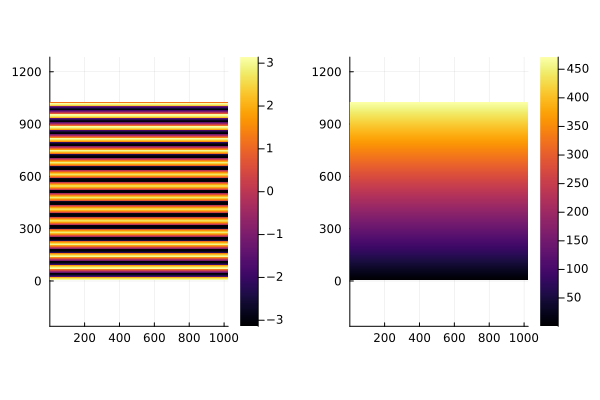

In [4]:
p1 = heatmap(phase_cos,aspect_ratio = :equal)#,size = (400,400))
p2 = heatmap(phase_shear,aspect_ratio=:equal)#,size = (400,400))
plot(p1,p2,layout = (1,2))#)grid(1,2,heights = [0.5]))#,width = [0.6,0.6]))

In [26]:
num = 1 # number of atoms

cloud_r = 1e-3  # radius of initial cloud
cloud_T = 6e-3  # (6 mK) initial temperatues/velocity

phase_out = Vector{Float64}(undef,num)
pos_out = Matrix{Float64}(undef,num,3)

atom_init_pos = init_pos(cloud_r,num)   # initialize atom position
atom_init_vel = init_vel(cloud_T,num)   # initialize atom velocity given temperature

seq = [[1.,-1.]]


Threads.@threads for i in 1:num # evaluate each atom in parallel
    r = atom_init_pos[i,:]
    v = atom_init_vel[i,:]
    phase_out_temp, pos_out_temp = atom_phase_path_seq(seq, r,v,0.,2e-3,1,phase_cos,1024*1e-3,phase_shear)
   # print("done\n")
    #phase_out[i] = phase_out_temp # final phase diff info
    
    #pos_out[i,:] = hcat(pos_out_temp)   # final position info   
    
end


hello
hi
now what 
here?


TaskFailedException: TaskFailedException

    nested task error: BoundsError: attempt to access Float64 at index [2]
    Stacktrace:
     [1] indexed_iterate(I::Float64, i::Int64, state::Nothing)
       @ Base ./tuple.jl:98
     [2] macro expansion
       @ ~/Documents/GitHub/AtomInterferometryPhase/demo_scripts/script_240704.ipynb:18 [inlined]
     [3] (::var"#501#threadsfor_fun#28"{UnitRange{Int64}})(onethread::Bool)
       @ Main ./threadingconstructs.jl:85
     [4] (::var"#501#threadsfor_fun#28"{UnitRange{Int64}})()
       @ Main ./threadingconstructs.jl:52

In [13]:
for (idx,d) in enumerate(seq)
    print(idx,"\n")
    print(d,"\n")
end


1
[1.0, -1.0]
